In [3]:
import sys
import os
sys.path.append(os.path.abspath(".."))
from analysis.Lifetime import LifetimeAnalysis
from analysis.utils import save_lifetimes_to_json
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import numpy as np
import seaborn as sns


In [5]:
u = mda.Universe('../data/6.6_2.gro', '../data/rep1_skip100.xtc')

# This is for lifetime


Add buffer length

In [6]:
la = LifetimeAnalysis(
    u,
    lipids=['POPC', 'DOPE'],
    NL='TRIO',
    water='TIP3',
    buffer_length=5,
    start=10,
    stop=100
)
la.run()
lifetimes = la.results


LifetimeAnalysis: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 90/90 [00:05<00:00, 15.50it/s]


In [7]:
save_lifetimes_to_json(la.results, out_dir='output_lifetimes')

Saved TRIO lifetimes to output_lifetimes/trio_lifetimes.json


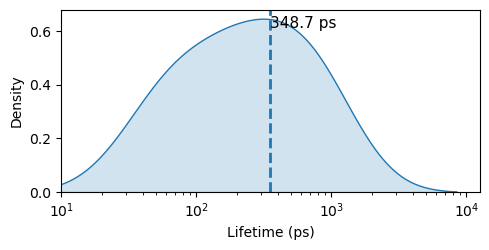

In [9]:


def load_lifetimes_from_json(json_file):
    with open(json_file, 'r') as f:
        lifetimes = json.load(f)
    return {int(k): v for k, v in lifetimes.items()}

def plot_lifetimes_kde(lifetimes, bw_adjust=1.5):
    all_lifetimes = [lt * 10 for lst in lifetimes.values() for lt in lst]
    if not all_lifetimes:
        print("No lifetimes to plot.")
        return

    avg = np.mean(all_lifetimes)

    plt.figure(figsize=(5, 2.6))
    sns.kdeplot(all_lifetimes, bw_adjust=bw_adjust, fill=True, alpha=0.2, log_scale=True)
    plt.axvline(avg, linestyle='--', linewidth=2)
    plt.text(avg, plt.gca().get_ylim()[1] * 0.9, f'{avg:.1f} ps', ha='left', fontsize=11)
    plt.xlabel("Lifetime (ps)")
    plt.ylabel("Density")
    plt.xlim(10, None)
    plt.tight_layout()
    plt.show()

# === Example use ===
lifetimes = load_lifetimes_from_json("output_lifetimes/trio_lifetimes.json")
plot_lifetimes_kde(lifetimes)


Saved ECDF plot to output_lifetime_c36/trio_lifetimes_ecdf.png


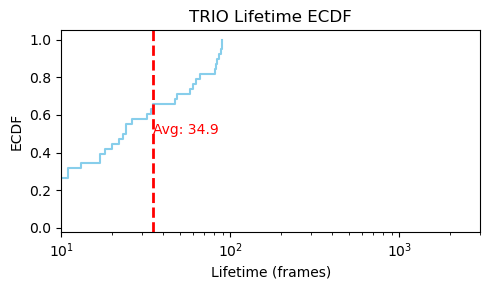

In [10]:

def plot_ecdf(lifetimes, save_fig=False, output_dir=""):
    all_lifetimes = np.sort([lt for lst in lifetimes.values() for lt in lst])
    
    if not all_lifetimes.size:
        print("No lifetimes to plot.")
        return

    y = np.arange(1, len(all_lifetimes) + 1) / len(all_lifetimes)
    
    plt.figure(figsize=(5, 3))
    plt.step(all_lifetimes, y, where='post', color='skyblue')
    
    avg = np.mean(all_lifetimes)
    plt.axvline(avg, color='red', linestyle='--', linewidth=2)
    plt.text(avg + 0.05, 0.5, f'Avg: {avg:.1f}', color='red', fontsize=10)

    plt.xlabel("Lifetime (frames)")
    plt.ylabel("ECDF")
    plt.xscale("log")
    plt.xlim(10, 3000)
    plt.title("TRIO Lifetime ECDF")
    plt.tight_layout()
    
    if save_fig:
        os.makedirs(output_dir, exist_ok=True)
        outpath = os.path.join(output_dir, "trio_lifetimes_ecdf.png")
        plt.savefig(outpath, dpi=300, bbox_inches='tight')
        print(f"Saved ECDF plot to {outpath}")

    plt.show()

# Example:
lifetimes = load_lifetimes_from_json("output_lifetimes/trio_lifetimes.json")
plot_ecdf(lifetimes, save_fig=True, output_dir="output_lifetime_c36")